## 1 Monte-Carlo Simulation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1 Data Creation and Visualization 

In [2]:
def create_data(N, y=None):
    if not(y is not None):
        y = np.random.randint(2, size=N)
    u = np.random.rand(N)
    x = y * np.sqrt(u) + (1-y) * (1-np.sqrt(-u + 1))
    return x, y

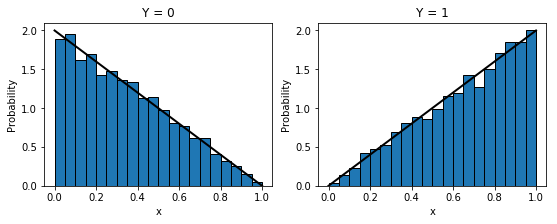

In [3]:
N = 10000
features, labels = create_data(N)

features0 = features[labels==0]
features1 = features[labels==1]

fig = plt.figure(figsize=(9,3))

# histogram for Y = 0
ax = fig.add_subplot(121)
ax.hist(features0, 20, normed=1, range=[0,1], ec='k')
ax.plot([0,1], [2,0], color='k', linestyle='-', linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Y = 0')

# histogram for Y = 1
ax = fig.add_subplot(122)
ax.hist(features1, 20, normed=1, range=[0,1], ec='k')
ax.plot([0,1], [0,2], color='k', linestyle='-', linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Y = 1')
plt.show()

### 1.2 Classification by Thresholding

In [4]:
# computes the error and its standard derivation for a certain prediction rule.
# M is the dataset size, N is the number of repetitions
def rule_error(rule, M, N=10):
    features, labels = create_data(M*N)
    predictions = rule(features)
    errors = np.average((predictions!=labels).reshape(M,N), axis=0)
    return np.average(errors), np.std(errors)

def rule_A(t, features):
    return (features > t).astype(np.int32)

def rule_B(t, features):
    return (features <= t).astype(np.int32)
    
def theoretical_error_A(t):
    return .25 + (t - .5)**2

def theoretical_error_B(t):
    return .75 - (t - .5)**2

In [5]:
ts = [0.2, 0.5, 0.6]
Ms = [10, 100, 1000, 10000]
N = 10
rules = [rule_A, rule_B]

for rule in rules:
    if rule == rule_A:
        print("---------------------Rule A---------------------")
    else:
        print("---------------------Rule B---------------------")
    
    print("theoretical errors:")
    for t in ts:
        if rule == rule_A:
            print("t = {:2.1f}, error = {:5.4f}".format(t, theoretical_error_A(t)))
        else:
            print("t = {:2.1f}, error = {:5.4f}".format(t, theoretical_error_B(t)))
    print()
    print("monte carlo errors:")
    
    for M in Ms:
        for t in ts:
            error, std = rule_error(lambda x: rule(t, x), M, 10)
            print("M = {:5d}, t = {:2.1f}, error = {:5.4f}, STD = {:4.4f}"
                  .format(M, t, error, std))
    print()
    print()           

---------------------Rule A---------------------
theoretical errors:
t = 0.2, error = 0.3400
t = 0.5, error = 0.2500
t = 0.6, error = 0.2600

monte carlo errors:
M =    10, t = 0.2, error = 0.3500, STD = 0.1746
M =    10, t = 0.5, error = 0.2600, STD = 0.1428
M =    10, t = 0.6, error = 0.2800, STD = 0.1536
M =   100, t = 0.2, error = 0.3270, STD = 0.0436
M =   100, t = 0.5, error = 0.2560, STD = 0.0429
M =   100, t = 0.6, error = 0.2700, STD = 0.0392
M =  1000, t = 0.2, error = 0.3384, STD = 0.0121
M =  1000, t = 0.5, error = 0.2413, STD = 0.0241
M =  1000, t = 0.6, error = 0.2528, STD = 0.0168
M = 10000, t = 0.2, error = 0.3407, STD = 0.0044
M = 10000, t = 0.5, error = 0.2523, STD = 0.0032
M = 10000, t = 0.6, error = 0.2611, STD = 0.0048


---------------------Rule B---------------------
theoretical errors:
t = 0.2, error = 0.6600
t = 0.5, error = 0.7500
t = 0.6, error = 0.7400

monte carlo errors:
M =    10, t = 0.2, error = 0.5400, STD = 0.1356
M =    10, t = 0.5, error = 0.7600, S

### 1.3 Nearest Neighbor Classification

In [6]:
def rule_NN(train_features, train_labels, features):
    N = len(features)
    n = len(train_features) # two in our case
    closest_train = (abs(np.tile(features, n) - np.repeat(train_features, N))).reshape(n,N).argmin(0) #numpy magic
    return train_labels[closest_train]

In [7]:
M = 100 #number of training sets
N = 1000 #size of test sets

errors = np.empty(M, dtype=np.float32)
stds = np.empty(M, dtype=np.float32)

for i in range(M): 
    train_features, train_labels = create_data(2, np.array([0,1]))
    errors[i], stds = rule_error(lambda x: rule_NN(train_features, train_labels, x), N)

print ("average nearest neighbour error = {:5.4f}, std = {:5.4f}".format(np.average(errors), np.std(errors)))
print ("average individual error std = {:5.4f}".format(np.average(stds)))

average nearest neighbour error = 0.3687, std = 0.1881
average individual error std = 0.0179
